# Lab 8.06

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
top_songs = pd.read_csv('top100_songs.csv')
top_songs.drop('Unnamed: 0', axis=1, inplace=True)
top_songs.head()

,Artists,Songs
0,Harry Styles,As It Was
1,Jack Harlow,First Class
2,Glass Animals,Heat Waves
3,Latto,Big Energy
4,Imagine Dragons X JID,Enemy


In [3]:
my_songs = pd.read_csv('my_songs.csv')
my_songs.drop('Unnamed: 0', axis=1, inplace=True)
my_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist
0,0.636,0.876,7,-3.413,1,0.0555,0.001640,0.000000,0.1170,0.799,120.983,audio_features,63WuQOXohQIxOxIFA2K7bR,spotify:track:63WuQOXohQIxOxIFA2K7bR,https://api.spotify.com/v1/tracks/63WuQOXohQIx...,https://api.spotify.com/v1/audio-analysis/63Wu...,148064,4,SUPERMODEL,Måneskin
1,0.504,0.895,6,-3.644,0,0.1270,0.000996,0.000087,0.0725,0.891,179.000,audio_features,5KnfGl2RbGJzlmM3r0oLww,spotify:track:5KnfGl2RbGJzlmM3r0oLww,https://api.spotify.com/v1/tracks/5KnfGl2RbGJz...,https://api.spotify.com/v1/audio-analysis/5Knf...,169613,4,Diggin' It,Royal Republic
2,0.454,0.949,9,-3.014,1,0.0984,0.009830,0.000000,0.3300,0.323,129.965,audio_features,7ay7vDG9NyF2NTrH15jpPZ,spotify:track:7ay7vDG9NyF2NTrH15jpPZ,https://api.spotify.com/v1/tracks/7ay7vDG9NyF2...,https://api.spotify.com/v1/audio-analysis/7ay7...,215654,4,I Don't Know You,Thundermother
3,0.571,0.626,5,-6.929,0,0.0372,0.174000,0.001700,0.1110,0.523,97.191,audio_features,5jH6P7e6RUGZnFGTeq3pUe,spotify:track:5jH6P7e6RUGZnFGTeq3pUe,https://api.spotify.com/v1/tracks/5jH6P7e6RUGZ...,https://api.spotify.com/v1/audio-analysis/5jH6...,211200,4,For the Love of Money,The Black Keys
4,0.463,0.729,2,-4.573,0,0.0469,0.018400,0.000000,0.0699,0.244,151.927,audio_features,6QDS3BSyRGSaTUY4MhJUir,spotify:track:6QDS3BSyRGSaTUY4MhJUir,https://api.spotify.com/v1/tracks/6QDS3BSyRGSa...,https://api.spotify.com/v1/audio-analysis/6QDS...,174032,4,Out of My Head feat. Aaron Gillespie,Charlotte Sands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0.457,0.645,1,-11.235,1,0.0946,0.904000,0.898000,0.1160,0.675,177.678,audio_features,1LBemY1Vmr78TYltVOiX2N,spotify:track:1LBemY1Vmr78TYltVOiX2N,https://api.spotify.com/v1/tracks/1LBemY1Vmr78...,https://api.spotify.com/v1/audio-analysis/1LBe...,214433,3,Don't Break,Immanuel Wilkins
963,0.276,0.525,2,-14.073,0,0.0449,0.305000,0.850000,0.1080,0.385,168.833,audio_features,5n2ungarkfmrpDS5VhKja6,spotify:track:5n2ungarkfmrpDS5VhKja6,https://api.spotify.com/v1/tracks/5n2ungarkfmr...,https://api.spotify.com/v1/audio-analysis/5n2u...,248562,4,Unrest II,Brandee Younger
964,0.368,0.297,0,-12.584,1,0.0342,0.971000,0.421000,0.1120,0.304,172.846,audio_features,4miACj3Pi7Pox3ylFNFZ9s,spotify:track:4miACj3Pi7Pox3ylFNFZ9s,https://api.spotify.com/v1/tracks/4miACj3Pi7Po...,https://api.spotify.com/v1/audio-analysis/4miA...,195778,4,Reste un oiseau,Anne Paceo
965,0.324,0.284,0,-19.674,0,0.0327,0.907000,0.876000,0.1200,0.170,102.037,audio_features,55sg7XJ6nyfOv1VM1OHdHD,spotify:track:55sg7XJ6nyfOv1VM1OHdHD,https://api.spotify.com/v1/tracks/55sg7XJ6nyfO...,https://api.spotify.com/v1/audio-analysis/55sg...,277000,4,What Happens Next?,Little North


In [4]:
#check if datasets have different songs
top_songs['Songs'].isin(my_songs['song_name']).sum() 

1

In [5]:
X = my_songs.select_dtypes(include = 'number')
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.636,0.876,7,-3.413,1,0.0555,0.001640,0.000000,0.1170,0.799,120.983,148064,4
1,0.504,0.895,6,-3.644,0,0.1270,0.000996,0.000087,0.0725,0.891,179.000,169613,4
2,0.454,0.949,9,-3.014,1,0.0984,0.009830,0.000000,0.3300,0.323,129.965,215654,4
3,0.571,0.626,5,-6.929,0,0.0372,0.174000,0.001700,0.1110,0.523,97.191,211200,4
4,0.463,0.729,2,-4.573,0,0.0469,0.018400,0.000000,0.0699,0.244,151.927,174032,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0.457,0.645,1,-11.235,1,0.0946,0.904000,0.898000,0.1160,0.675,177.678,214433,3
963,0.276,0.525,2,-14.073,0,0.0449,0.305000,0.850000,0.1080,0.385,168.833,248562,4
964,0.368,0.297,0,-12.584,1,0.0342,0.971000,0.421000,0.1120,0.304,172.846,195778,4
965,0.324,0.284,0,-19.674,0,0.0327,0.907000,0.876000,0.1200,0.170,102.037,277000,4


In [49]:
scaler = StandardScaler()
X_prep = scaler.fit_transform(X)
pd.DataFrame(X_prep).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.458462,0.952626,0.487092,0.766909,0.825675,-0.252541,-0.817932,-0.544648,-0.406978,1.253637,0.014906,-0.815255,0.2151
1,-0.242714,1.021542,0.204029,0.734689,-1.211130,0.891711,-0.819770,-0.544390,-0.752494,1.613091,1.938237,-0.641408,0.2151
2,-0.508310,1.217410,1.053220,0.822563,0.825675,0.434010,-0.794566,-0.544648,1.246843,-0.606150,0.312670,-0.269972,0.2151
3,0.113186,0.045831,-0.079035,0.276492,-1.211130,-0.545406,-0.326190,-0.539614,-0.453564,0.175273,-0.773826,-0.305905,0.2151
4,-0.460503,0.419430,-0.928227,0.605111,-1.211130,-0.390172,-0.770116,-0.544648,-0.772682,-0.914813,1.040736,-0.605758,0.2151


Text(0.5, 1.0, 'Elbow method showing the optimal K')

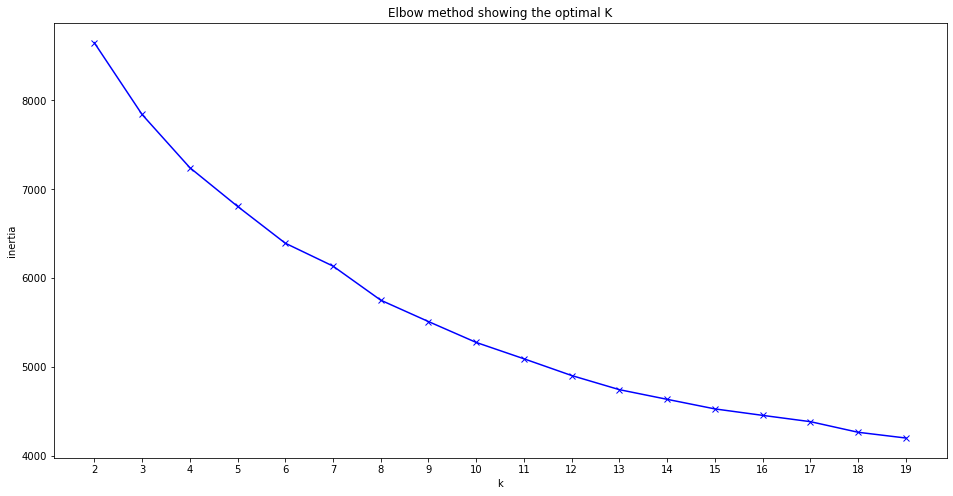

In [7]:
from sklearn.cluster import KMeans

K = range(2,20)
inertia = []
for k in K:
    kmeans = KMeans(n_clusters = k,random_state = 1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize = (16,8))
plt.plot(K,inertia,'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('Elbow method showing the optimal K')

In [33]:
kmeans = KMeans(n_clusters=7,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

6778.053613597634


In [31]:

# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)
clusters.shape

(967,)

In [10]:

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    236
1    114
2    294
3     20
4    129
5     47
6    127
dtype: int64

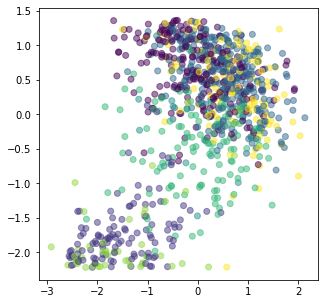

In [11]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=clusters,alpha=0.5)
plt.show()

In [46]:
my_songs['clusters'] = clusters
my_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,clusters
0,0.636,0.876,7,-3.413,1,0.0555,0.001640,0.000000,0.1170,0.799,...,audio_features,63WuQOXohQIxOxIFA2K7bR,spotify:track:63WuQOXohQIxOxIFA2K7bR,https://api.spotify.com/v1/tracks/63WuQOXohQIx...,https://api.spotify.com/v1/audio-analysis/63Wu...,148064,4,SUPERMODEL,Måneskin,2
1,0.504,0.895,6,-3.644,0,0.1270,0.000996,0.000087,0.0725,0.891,...,audio_features,5KnfGl2RbGJzlmM3r0oLww,spotify:track:5KnfGl2RbGJzlmM3r0oLww,https://api.spotify.com/v1/tracks/5KnfGl2RbGJz...,https://api.spotify.com/v1/audio-analysis/5Knf...,169613,4,Diggin' It,Royal Republic,0
2,0.454,0.949,9,-3.014,1,0.0984,0.009830,0.000000,0.3300,0.323,...,audio_features,7ay7vDG9NyF2NTrH15jpPZ,spotify:track:7ay7vDG9NyF2NTrH15jpPZ,https://api.spotify.com/v1/tracks/7ay7vDG9NyF2...,https://api.spotify.com/v1/audio-analysis/7ay7...,215654,4,I Don't Know You,Thundermother,0
3,0.571,0.626,5,-6.929,0,0.0372,0.174000,0.001700,0.1110,0.523,...,audio_features,5jH6P7e6RUGZnFGTeq3pUe,spotify:track:5jH6P7e6RUGZnFGTeq3pUe,https://api.spotify.com/v1/tracks/5jH6P7e6RUGZ...,https://api.spotify.com/v1/audio-analysis/5jH6...,211200,4,For the Love of Money,The Black Keys,0
4,0.463,0.729,2,-4.573,0,0.0469,0.018400,0.000000,0.0699,0.244,...,audio_features,6QDS3BSyRGSaTUY4MhJUir,spotify:track:6QDS3BSyRGSaTUY4MhJUir,https://api.spotify.com/v1/tracks/6QDS3BSyRGSa...,https://api.spotify.com/v1/audio-analysis/6QDS...,174032,4,Out of My Head feat. Aaron Gillespie,Charlotte Sands,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0.457,0.645,1,-11.235,1,0.0946,0.904000,0.898000,0.1160,0.675,...,audio_features,1LBemY1Vmr78TYltVOiX2N,spotify:track:1LBemY1Vmr78TYltVOiX2N,https://api.spotify.com/v1/tracks/1LBemY1Vmr78...,https://api.spotify.com/v1/audio-analysis/1LBe...,214433,3,Don't Break,Immanuel Wilkins,3
963,0.276,0.525,2,-14.073,0,0.0449,0.305000,0.850000,0.1080,0.385,...,audio_features,5n2ungarkfmrpDS5VhKja6,spotify:track:5n2ungarkfmrpDS5VhKja6,https://api.spotify.com/v1/tracks/5n2ungarkfmr...,https://api.spotify.com/v1/audio-analysis/5n2u...,248562,4,Unrest II,Brandee Younger,4
964,0.368,0.297,0,-12.584,1,0.0342,0.971000,0.421000,0.1120,0.304,...,audio_features,4miACj3Pi7Pox3ylFNFZ9s,spotify:track:4miACj3Pi7Pox3ylFNFZ9s,https://api.spotify.com/v1/tracks/4miACj3Pi7Po...,https://api.spotify.com/v1/audio-analysis/4miA...,195778,4,Reste un oiseau,Anne Paceo,4
965,0.324,0.284,0,-19.674,0,0.0327,0.907000,0.876000,0.1200,0.170,...,audio_features,55sg7XJ6nyfOv1VM1OHdHD,spotify:track:55sg7XJ6nyfOv1VM1OHdHD,https://api.spotify.com/v1/tracks/55sg7XJ6nyfO...,https://api.spotify.com/v1/audio-analysis/55sg...,277000,4,What Happens Next?,Little North,1


In [41]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='9d5b81b176e145c48ed913c9881044ad',
                                                           client_secret='4db87ed80dab4b999284a7a63dfadb02'))

In [96]:
def recommend():
    user_input = input("What is your favourite song? Type the song title: ")
    search = top_songs['Songs'].str.contains(user_input, na=False, case=False)
    if search.sum() > 0:
        song_in = top_songs[top_songs['Songs'].str.contains(user_input, na=False, case=False)].sample()
        song_out = top_songs.sample()
        return f'''The song "{song_in.iloc[0]['Songs']}" by {song_in.iloc[0]['Artists']} is on Top 100. You might also like: "{song_out.iloc[0]['Songs']}" by {song_out.iloc[0]['Artists']}.'''
    else:
        result = sp.search(q=user_input, type='track', limit=1)
        song_uri = result['tracks' ][ 'items'][0]['uri']
        audio_features = sp.audio_features (song_uri)
        audio_features_df = pd.DataFrame(audio_features)
        input_audio_features_df = audio_features_df.select_dtypes (include=np.number)
        input_scaler_audio_features = scaler.transform(input_audio_features_df)
        cluster_input_song = kmeans.predict(input_scaler_audio_features)
        song_out = my_songs[my_songs['clusters'] == cluster_input_song[0]].sample()[['song_name', 'artist']]
        
        return f"""The song "{str(result['tracks']['items'][0]['name'])}" by {str(result['tracks']['items'][0]['artists'][0]['name'])} is not on the Top 100. Here's another one for you to check out: "{song_out.iloc[0][0]}" by {song_out.iloc[0][1]}"""

In [95]:
recommend()

What is your favourite song? Type the song title: enemy


'The song "Enemy" by Imagine Dragons X JID is on Top 100. You might also like: "First Class" by Jack Harlow.'

In [97]:
recommend()

What is your favourite song? Type the song title: baby shark


'The song "Baby Shark" by Pinkfong is not on the Top 100. Here\'s another one for you to check out: "Happier" by Marshmello'